## EDA

Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
def load_data():
    df = pd.read_csv('../input/accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)
    return df

Load Data

In [3]:
loan = load_data()

In [4]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

### Selecting features
- loan_amnt - The listed amount of the loan applied by the borrower.
- term - The number of payments on the loan, where values are in months and can be either 36 or 60.
- int_rate - The interest rate on the loan
- sub_grade - Assigned loan subgrade score based on borrower's credit history
- emp_length - Borrow's employment length in years.
- home_ownership - The homeownership status provided by the borrower (eg rent, own, mortgage, etc)
- annual_inc - The self-reported annual income provided by the borrower
- addr_state - The state provided by the borrower in the loan application
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borrower’s monthly income.
- mths_since_recent_inq - Months since most recent inquiry
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- bc_open_to_buy - Total open to buy on revolving bankcards
- bc_util - Ratio of total current balance to high credit/credit limit for all bankcard accounts
- num_op_rev_tl - Number of open revolving accounts
- loan_status - Current status of the loan (eg fully paid or charged off), this is the label we are going to predict with the model.

In [5]:
sel_features = ['id','loan_amnt', 'term','int_rate', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'addr_state', 'dti', 'mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl', 'loan_status']

df = loan[sel_features] 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   loan_amnt              float64
 2   term                   object 
 3   int_rate               float64
 4   sub_grade              object 
 5   emp_length             object 
 6   home_ownership         object 
 7   annual_inc             float64
 8   addr_state             object 
 9   dti                    float64
 10  mths_since_recent_inq  float64
 11  revol_util             float64
 12  bc_open_to_buy         float64
 13  bc_util                float64
 14  num_op_rev_tl          float64
 15  loan_status            object 
dtypes: float64(9), object(7)
memory usage: 276.0+ MB


### Defining Target
The label that we will work with is loan_status which has the following values:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate).
- Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan.

In [6]:
df['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

In [7]:
print(df.shape)
df = df[(df['loan_status'] == 'Fully Paid') |
   (df['loan_status'] == 'Charged Off')
   ]
print(df.shape)

(2260701, 16)
(1345310, 16)


In [8]:
df['loan_status'].value_counts(normalize=True,dropna=False)

loan_status
Fully Paid     0.800374
Charged Off    0.199626
Name: proportion, dtype: float64

In [9]:
df.rename(columns={'loan_status':'target'},inplace=True)

In [10]:
df['target'].replace({
    'Fully Paid':0,
    'Charged Off':1
}, inplace=True)

In [11]:
df.target.value_counts(normalize=True).mul(100).round(2)

target
0    80.04
1    19.96
Name: proportion, dtype: float64

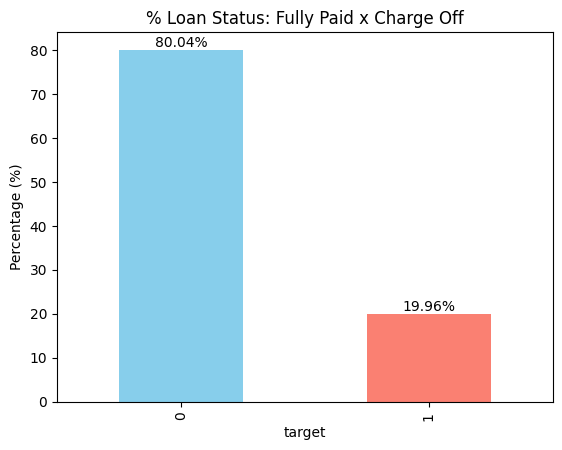

In [12]:


percentuais = df.target.value_counts(normalize=True).mul(100).round(2)


# Plotando o gráfico de barras
ax = percentuais.plot(kind='bar', color=['skyblue', 'salmon'])

# Adicionando porcentagens acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='top', 
                xytext=(0, 10), 
                textcoords='offset points')

# Definindo o título e os rótulos do eixo y
plt.title('% Loan Status: Fully Paid x Charge Off')
plt.ylabel('Percentage (%)')
plt.show()



### Studying Features

### numerical features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  object 
 1   loan_amnt              1345310 non-null  float64
 2   term                   1345310 non-null  object 
 3   int_rate               1345310 non-null  float64
 4   sub_grade              1345310 non-null  object 
 5   emp_length             1266799 non-null  object 
 6   home_ownership         1345310 non-null  object 
 7   annual_inc             1345310 non-null  float64
 8   addr_state             1345310 non-null  object 
 9   dti                    1344936 non-null  float64
 10  mths_since_recent_inq  1171239 non-null  float64
 11  revol_util             1344453 non-null  float64
 12  bc_open_to_buy         1284167 non-null  float64
 13  bc_util                1283398 non-null  float64
 14  num_op_rev_tl          

### Histogram of numerical vars



target
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

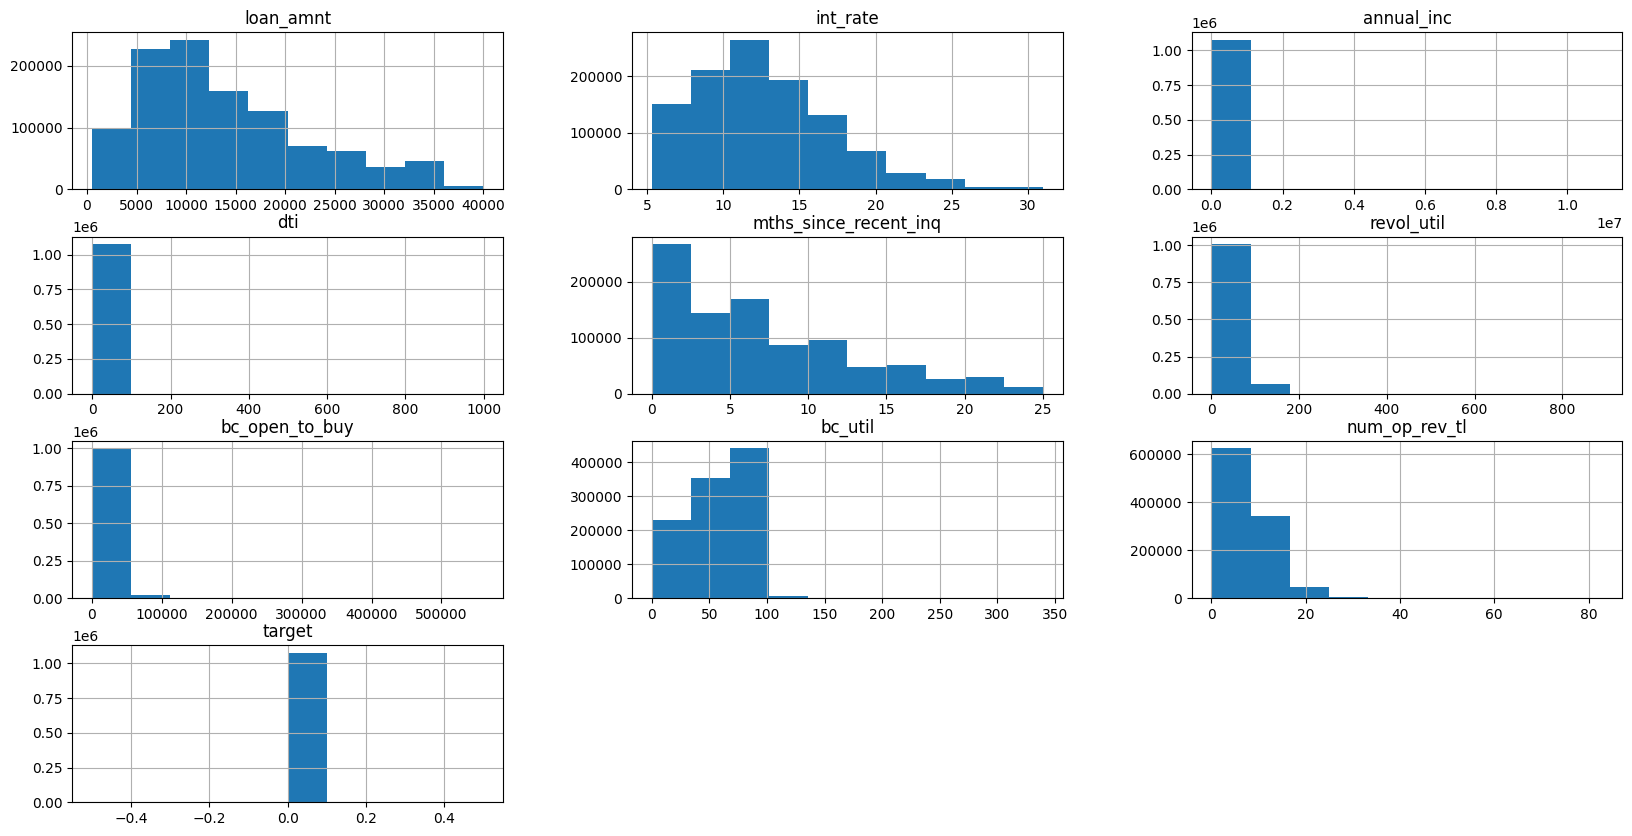

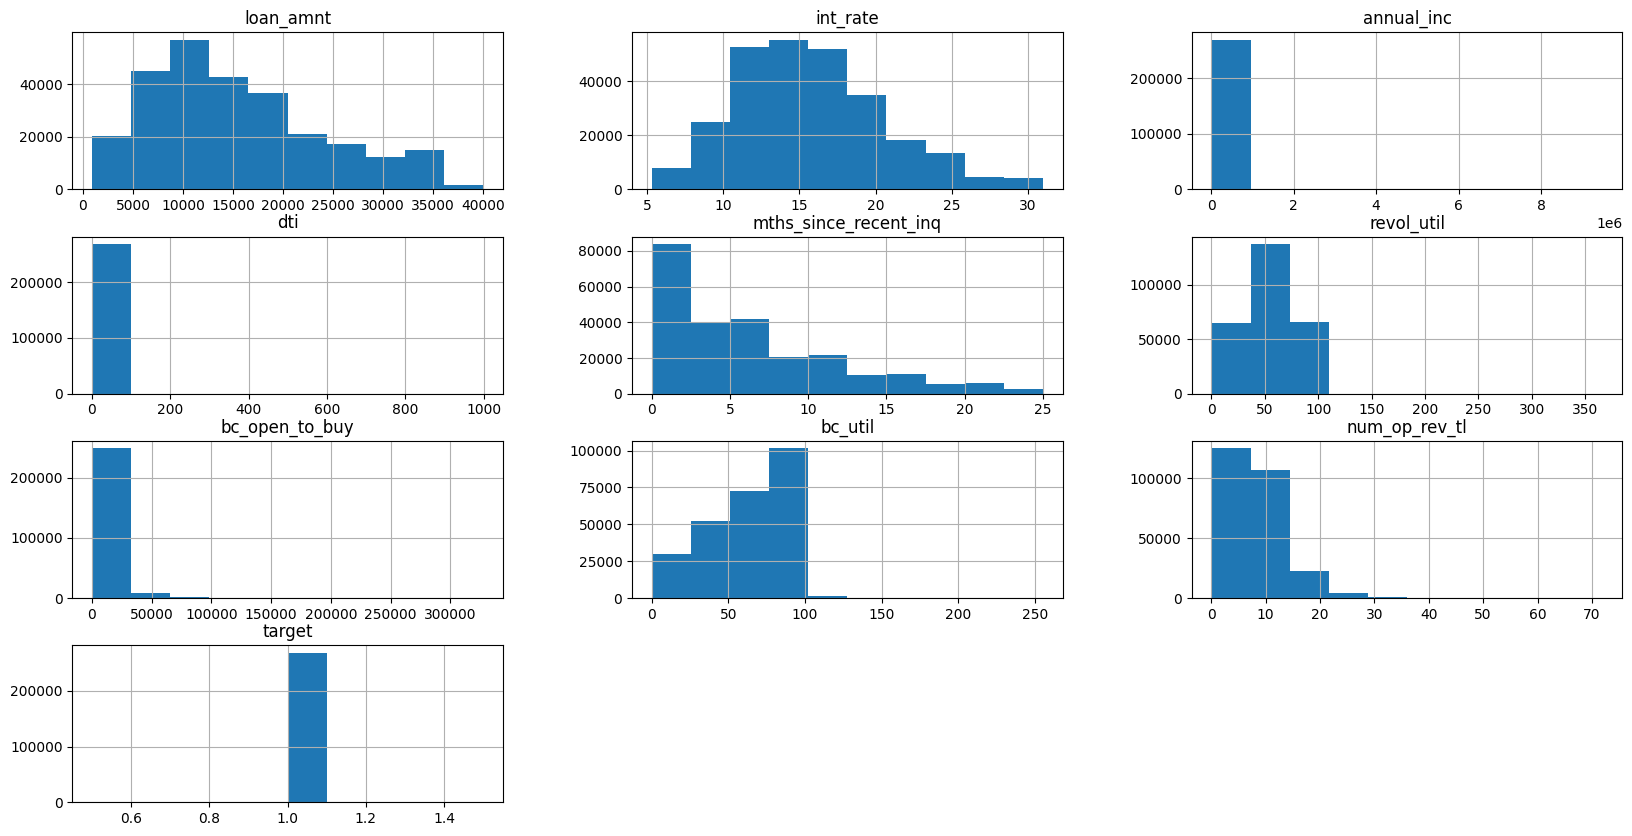

In [14]:
df.select_dtypes(include=['float64','int64']).groupby('target').hist(bins = 10, figsize = (20,10)) 

### boxplot of numerical vars



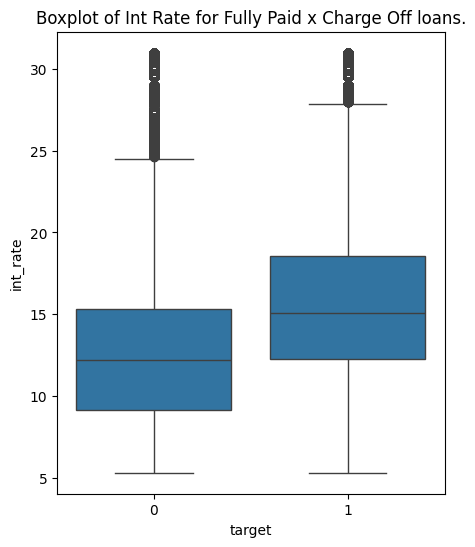

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 6))
sns.boxplot(x=df['target'], y=df['int_rate'])
plt.title("Boxplot of Int Rate for Fully Paid x Charge Off loans.")
plt.show()

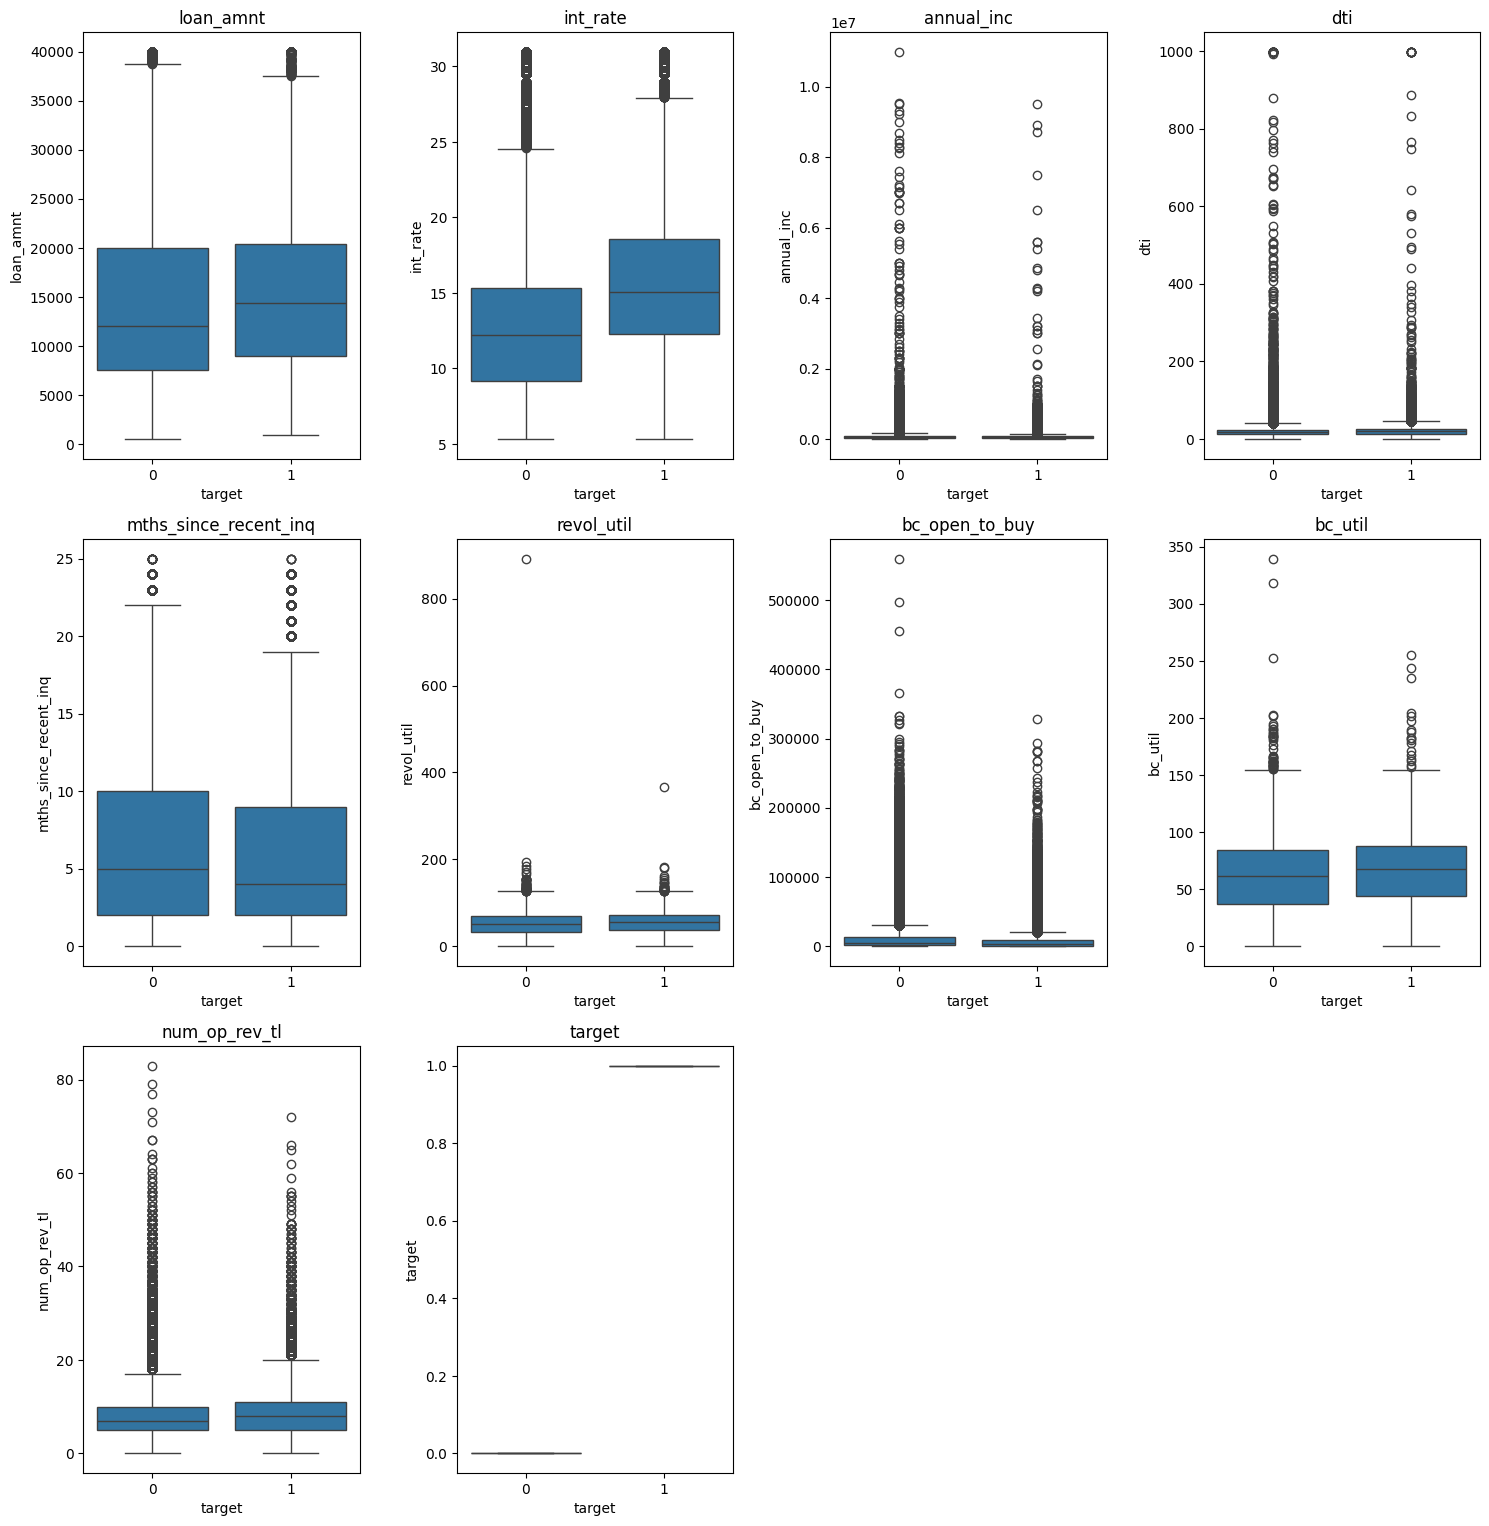

In [16]:
# Número de colunas
columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_columns = [len(columns)]

# Criação dos boxplots
plt.figure(figsize=(15, 20))  # Defina o tamanho da figura conforme a necessidade
for i, column in enumerate(columns, 1):
    # plt.subplot(1, num_columns, i)
    plt.subplot(4, 4, i)
    # plt.boxplot(df[column])
    sns.boxplot(x=df['target'], y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### categorical features processing



### categorical features

In [17]:
columns = df.select_dtypes(include=['object']).columns.tolist()
columns

['id', 'term', 'sub_grade', 'emp_length', 'home_ownership', 'addr_state']

In [18]:
df[columns].nunique()

id                1345310
term                    2
sub_grade              35
emp_length             11
home_ownership          6
addr_state             51
dtype: int64

In [19]:
pd.crosstab(df.target,df.term, normalize='index')

term,36 months,60 months
target,,
0,0.796369,0.203631
1,0.607881,0.392119


In [20]:
pd.crosstab(df.target,df.home_ownership, normalize='index').mul(100)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
target,,,,,,
0,0.021361,51.176920,0.003808,0.010866,10.677306,38.109739
1,0.020852,42.646495,0.002607,0.010054,11.120089,46.199904


### Transformation!

In [21]:
cleaner_app_type = {"term": {" 36 months": 1.0, " 60 months": 2.0},
                    "sub_grade": {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0,
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
df = df.replace(cleaner_app_type)

### Creating map to replace addr_state by proportion of states

In [22]:
map_addr_state = (
    df.addr_state.value_counts(dropna=False,normalize=True,ascending=True)
    .cumsum().to_frame()
    .reset_index() ## bring states
    .reset_index() ## bring index
    .assign(index=lambda x: x['index'] + 1) ## adding 1 to index
    .set_index('addr_state')['index'].to_dict() ## create a map to replace by proportion
    )

import joblib
joblib.dump(map_addr_state, '../artifacts/map_addr_state.joblib')

df.addr_state.replace(map_addr_state,inplace=True)

In [23]:
map_addr_state

{'IA': 1,
 'ND': 2,
 'ID': 3,
 'ME': 4,
 'VT': 5,
 'SD': 6,
 'WY': 7,
 'AK': 8,
 'DC': 9,
 'NE': 10,
 'DE': 11,
 'MT': 12,
 'WV': 13,
 'RI': 14,
 'NH': 15,
 'MS': 16,
 'HI': 17,
 'NM': 18,
 'UT': 19,
 'AR': 20,
 'KS': 21,
 'OK': 22,
 'KY': 23,
 'LA': 24,
 'SC': 25,
 'OR': 26,
 'AL': 27,
 'WI': 28,
 'CT': 29,
 'NV': 30,
 'TN': 31,
 'MO': 32,
 'IN': 33,
 'MN': 34,
 'WA': 35,
 'CO': 36,
 'MA': 37,
 'MD': 38,
 'AZ': 39,
 'MI': 40,
 'NC': 41,
 'VA': 42,
 'GA': 43,
 'OH': 44,
 'PA': 45,
 'NJ': 46,
 'IL': 47,
 'FL': 48,
 'NY': 49,
 'TX': 50,
 'CA': 51}

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  object 
 1   loan_amnt              1345310 non-null  float64
 2   term                   1345310 non-null  float64
 3   int_rate               1345310 non-null  float64
 4   sub_grade              1345310 non-null  float64
 5   emp_length             1266799 non-null  float64
 6   home_ownership         1345310 non-null  object 
 7   annual_inc             1345310 non-null  float64
 8   addr_state             1345310 non-null  int64  
 9   dti                    1344936 non-null  float64
 10  mths_since_recent_inq  1171239 non-null  float64
 11  revol_util             1344453 non-null  float64
 12  bc_open_to_buy         1284167 non-null  float64
 13  bc_util                1283398 non-null  float64
 14  num_op_rev_tl          

In [25]:
#another way to check feature correlations
loans_cor=df.select_dtypes(include=['float64','int64']).corr()
loans_cor


,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl,target
loan_amnt,1.000000,0.380905,0.141673,0.145153,0.089391,0.311794,0.019045,0.032057,-0.000149,0.108478,0.198762,0.052871,0.166973,0.065604
term,0.380905,1.000000,0.417230,0.432354,0.055466,0.050016,-0.018615,0.059440,-0.027421,0.063920,0.007740,0.048819,0.049946,0.176096
int_rate,0.141673,0.417230,1.000000,0.970842,-0.004209,-0.072245,-0.005065,0.146886,-0.168946,0.243152,-0.281675,0.254079,-0.008846,0.258792
sub_grade,0.145153,0.432354,0.970842,1.000000,-0.005247,-0.070813,-0.006363,0.149843,-0.175445,0.246668,-0.285405,0.258145,-0.006208,0.266006
emp_length,0.089391,0.055466,-0.004209,-0.005247,1.000000,0.066329,-0.013821,0.026039,0.001036,0.035312,0.024985,0.029180,0.111229,-0.014235
annual_inc,0.311794,0.050016,-0.072245,-0.070813,0.066329,1.000000,0.043695,-0.140488,-0.041219,0.035254,0.158734,-0.003629,0.078689,-0.041759
addr_state,0.019045,-0.018615,-0.005065,-0.006363,-0.013821,0.043695,1.000000,-0.052910,0.010914,-0.027553,0.033257,-0.026062,0.055532,0.009270
dti,0.032057,0.059440,0.146886,0.149843,0.026039,-0.140488,-0.052910,1.000000,-0.001242,0.140801,-0.059878,0.144120,0.137357,0.084510
mths_since_recent_inq,-0.000149,-0.027421,-0.168946,-0.175445,0.001036,-0.041219,0.010914,-0.001242,1.000000,0.092632,-0.020077,0.082883,-0.092829,-0.056199
revol_util,0.108478,0.063920,0.243152,0.246668,0.035312,0.035254,-0.027553,0.140801,0.092632,1.000000,-0.480061,0.855022,-0.205152,0.060048


<Axes: >

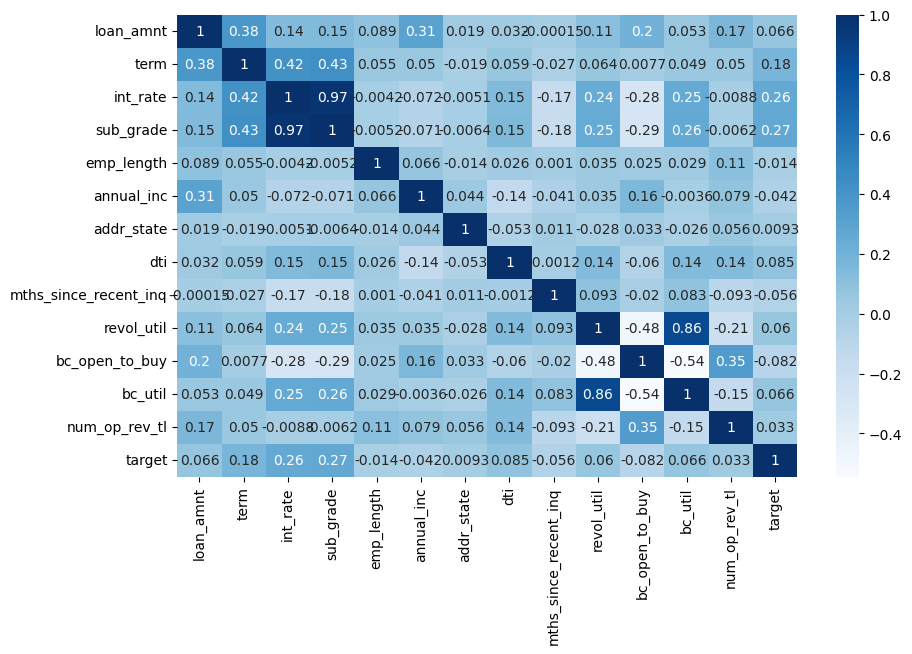

In [26]:

#add colors based on correlations numbers

plt.figure(figsize=(10,6))
sns.heatmap(loans_cor, annot=True,cmap=plt.cm.Blues)


### Transformation!

In [27]:
#drop columns
df.drop(["bc_util", "revol_util","int_rate", "sub_grade"], axis = 1, inplace = True)


<Axes: >

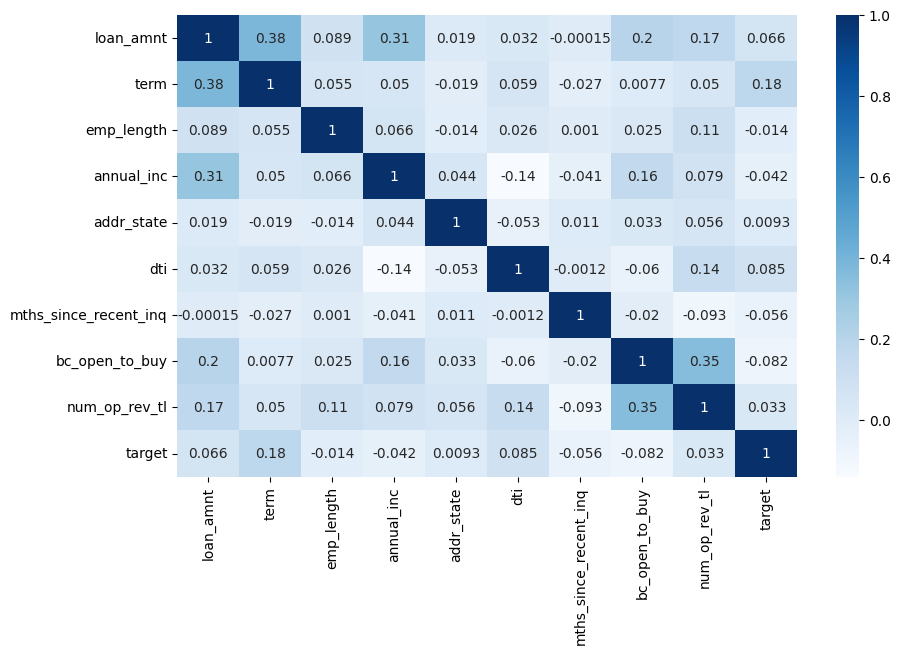

In [28]:

#add colors based on correlations numbers

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True,cmap=plt.cm.Blues)


In [29]:
df.columns.tolist()

['id',
 'loan_amnt',
 'term',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'addr_state',
 'dti',
 'mths_since_recent_inq',
 'bc_open_to_buy',
 'num_op_rev_tl',
 'target']

## METADATA

In [30]:
def BuildMetadata(dataframe,target,id): 

    train = dataframe.rename(columns={target:'target',id:'id'})
    # Verifica os tipos de variáveis presentes na tabela de treino
    t = []
    for i in train.columns:
            t.append(train[i].dtype)

    n = []
    for i in train.columns:
            n.append(i)

    aux_t = pd.DataFrame(data=t,columns=["Tipos"])
    aux_n = pd.DataFrame(data=n,columns=["Features"])
    # df_tipovars = pd.concat([aux_n, aux_t], axis=1, join_axes=[aux_n.index])
    df_tipovars = pd.concat([aux_n, aux_t.reindex(aux_n.index)], axis=1)


    data = []
    for f in train.columns:

        # Definindo o papel das variáveis:
        if f == 'target':
            role = 'target'
        elif f == 'id':
            role = 'id'
        else:
            role = 'input'

        # Definindo o tipo das variáveis: nominal, ordinal, binary ou interval
        if f == 'target':
            level = 'binary'
        if train[f].dtype == 'object' or f == 'id': 
            level = 'nominal'
        elif train[f].dtype in ['float','float64'] :
            level = 'interval'
        elif train[f].dtype in ['int','int64'] :
            level = 'ordinal'

        # Todas variáveis são incializadas com keep exceto o id
        keep = True
        if f == 'id':
            keep = False

        # Definindo o tipo das variáveis da tabela de entrada
        dtype = train[f].dtype

        # Criando a lista com todo metadados
        f_dict = {
            'Features': f,
            'Role': role,
            'Level': level,
            'Keep': keep,
            'Tipo': dtype
        }
        data.append(f_dict)

    meta = pd.DataFrame(data, columns=['Features', 'Role', 'Level', 'Keep', 'Tipo'])

    # Quantidade de domínios distintos para cada cariável do tipo ordinal e nominal
    card = []

    v = train.columns
    for f in v:
        dist_values = train[f].value_counts().shape[0]
        f_dict = {
                'Features': f,
                'Cardinality': dist_values
            }
        card.append(f_dict)

    card = pd.DataFrame(card, columns=['Features', 'Cardinality'])

    metadados_train = pd.merge(meta, card, on='Features')

    return metadados_train 

In [31]:
id = 'id' 
target = 'target'


In [32]:
select_cols = df.columns.tolist()
select_cols

['id',
 'loan_amnt',
 'term',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'addr_state',
 'dti',
 'mths_since_recent_inq',
 'bc_open_to_buy',
 'num_op_rev_tl',
 'target']

In [33]:
metadata = BuildMetadata(df[select_cols],target,id)

In [34]:
df.head()

,id,loan_amnt,term,emp_length,home_ownership,annual_inc,addr_state,dti,mths_since_recent_inq,bc_open_to_buy,num_op_rev_tl,target
0,68407277,3600.0,1.0,10.0,MORTGAGE,55000.0,45,5.91,4.0,1506.0,4.0,0
1,68355089,24700.0,1.0,10.0,MORTGAGE,65000.0,6,16.06,0.0,57830.0,20.0,0
2,68341763,20000.0,2.0,10.0,MORTGAGE,63000.0,47,10.78,10.0,2737.0,4.0,0
4,68476807,10400.0,2.0,3.0,MORTGAGE,104433.0,45,25.37,1.0,4567.0,7.0,0
5,68426831,11950.0,1.0,4.0,RENT,34000.0,43,10.20,NaN,844.0,4.0,0


In [35]:
metadata.to_csv('../artifacts/metadata.csv', sep=',', encoding='utf-8',index=False)
df[select_cols].to_csv('../input/df.csv', sep=',', encoding='utf-8',index=False)